In [3]:
#Import some required library
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [4]:
#Read the file
wine= pd.read_csv("wine.csv")
wine 

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
wine.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
wine.head(10) 

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [7]:
wine.tail(10) 

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750
169,3,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560


In [8]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [9]:
# Considering only numerical data 
wine.data = wine.iloc[:,1:]
wine.data.head()
# Converting into numpy array
WINE = wine.data.values
WINE 

C:\Users\Anand Jagdale\AppData\Local\Temp\ipykernel_7116\62559601.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  wine.data = wine.iloc[:,1:]


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [10]:
# Normalizing the numerical data 
wine_normal = scale(WINE) 
wine_normal 

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [11]:
#Cal. pca_values for 13 features
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine_normal)
pca_values  

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [12]:
#loadings or weights
pca.components_ 

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [13]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var 

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [14]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

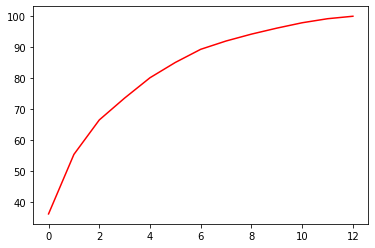

In [15]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red") 

In [16]:
 pca_values[:,0:2]  

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [17]:
#Create the combine dataframe with pc1, pc2 & Type
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Type']]], axis = 1)
finalDf

,pc1,pc2,Type
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
...,...,...,...
173,-3.370524,-2.216289,3
174,-2.601956,-1.757229,3
175,-2.677839,-2.760899,3
176,-2.387017,-2.297347,3


In [18]:
import matplotlib.pyplot as plt
plt.style.use('classic')

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

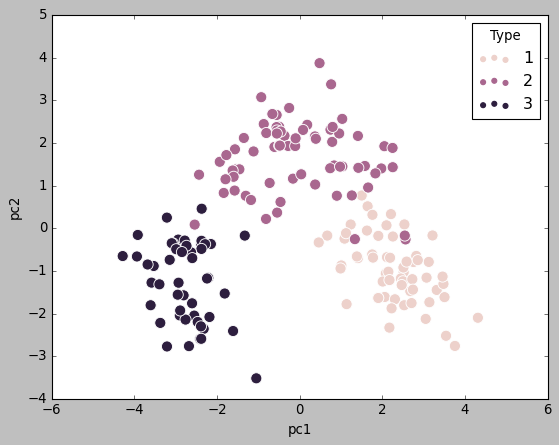

In [19]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type',s = 100)  

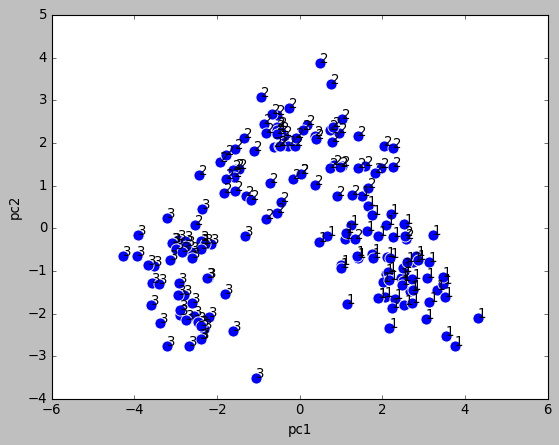

In [20]:
p1 = sns.scatterplot(data=finalDf,x='pc1',y='pc2',s = 100)  
for line in range(0,finalDf.shape[0]):
     p1.text(finalDf.pc1[line], finalDf.pc2[line],finalDf.Type[line], horizontalalignment='left', size='medium')

In [21]:
#Create the dataframe for performing heirarchial and k mean clustering with considering only 3 principal component score
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), wine[['Type']]], axis = 1)
finalDf

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


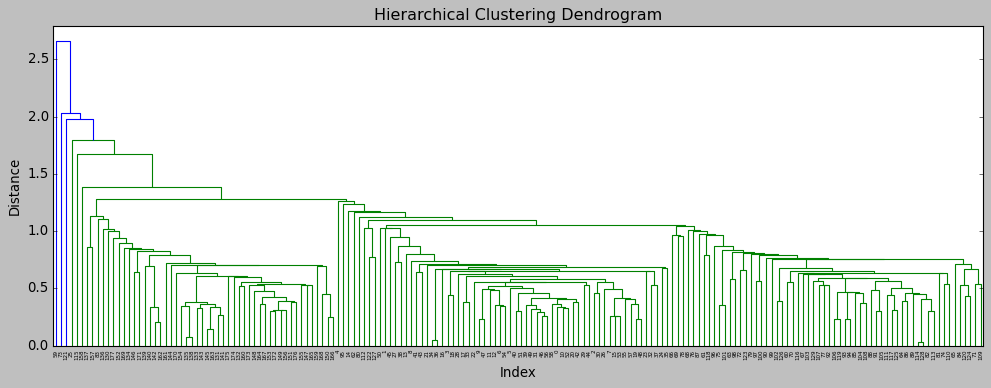

In [22]:
from scipy.cluster.hierarchy import linkage 
# for creating dendrogram 
import scipy.cluster.hierarchy as sch 
#p = np.array(df_norm) 
# converting into numpy array format
#leaf_rotation=0.,  # rotates the x axis labels
#leaf_font_size=8.,  # font size for the x axis labels
SINGLE_L= linkage(finalDf, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(SINGLE_L) 
plt.show() 

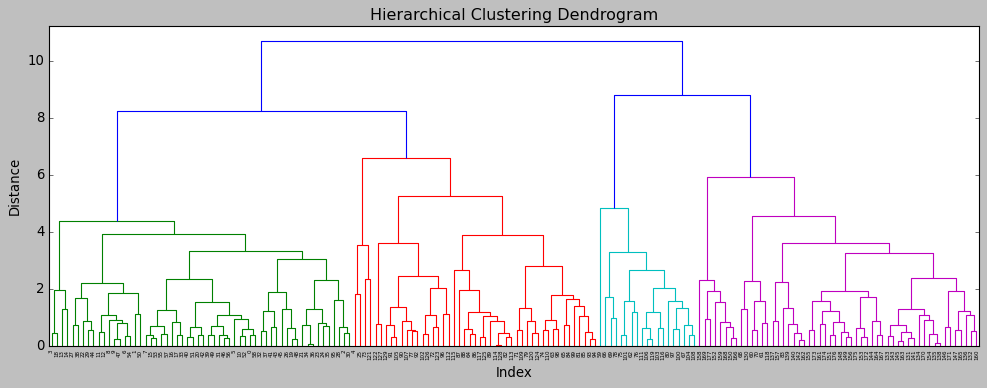

In [23]:
from scipy.cluster.hierarchy import linkage 
# for creating dendrogram 
import scipy.cluster.hierarchy as sch 
#p = np.array(df_norm) 
# converting into numpy array format
#leaf_rotation=0.,  # rotates the x axis labels
#leaf_font_size=8.,  # font size for the x axis labels
COMPLETE_L= linkage(finalDf, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(COMPLETE_L) 
plt.show()

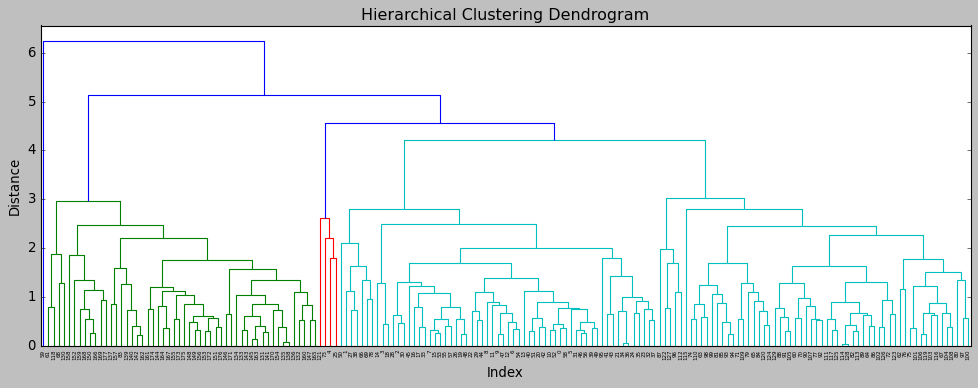

In [24]:
#If we using single, complete linkage then we got very complicated dendrogram & its very dificult to cut the dendrogram to classifying the clusters so we used directly average linkage which is give a best dendrogram
from scipy.cluster.hierarchy import linkage 
# for creating dendrogram 
import scipy.cluster.hierarchy as sch 
#p = np.array(df_norm) 
# converting into numpy array format
#leaf_rotation=0.,  # rotates the x axis labels
#leaf_font_size=8.,  # font size for the x axis labels
AVG_L= linkage(finalDf, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(AVG_L) 
plt.show() 

In [25]:
# Creating a  new column as clust and assigning the obs. which cluster belong it to new column
from sklearn.cluster import AgglomerativeClustering 
AVG_L = AgglomerativeClustering(n_clusters=3, linkage='average',affinity = "euclidean").fit(finalDf) 
#n_clusters=3 (no.of cluster getting in denderogram)
cluster_labels=pd.Series(AVG_L.labels_)
cluster_labels
finalDf['Clust']=cluster_labels 
finalDf 

,pc1,pc2,pc3,Type,Clust
0,3.316751,-1.443463,-0.165739,1,0
1,2.209465,0.333393,-2.026457,1,0
2,2.516740,-1.031151,0.982819,1,0
3,3.757066,-2.756372,-0.176192,1,0
4,1.008908,-0.869831,2.026688,1,0
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3,2
174,-2.601956,-1.757229,0.207581,3,2
175,-2.677839,-2.760899,-0.940942,3,2
176,-2.387017,-2.297347,-0.550696,3,2


In [26]:
#Find mean for each & every cluster based on variables by using groupby function
finalDf.iloc[:,:].groupby(finalDf.Clust).mean()

,pc1,pc2,pc3,Type
Clust,,,,
0,1.123706,0.432914,0.139887,1.528000
1,-0.928582,3.073486,-4.585064,2.000000
2,-2.683358,-1.099763,-0.248092,2.923077


In [27]:
#No. of observation belongs to CLUSTER[0]
data = finalDf[(finalDf.Clust==0)]
data 

,pc1,pc2,pc3,Type,Clust
0,3.316751,-1.443463,-0.165739,1,0
1,2.209465,0.333393,-2.026457,1,0
2,2.516740,-1.031151,0.982819,1,0
3,3.757066,-2.756372,-0.176192,1,0
4,1.008908,-0.869831,2.026688,1,0
...,...,...,...,...,...
125,-0.096810,2.109998,0.434826,2,0
126,0.038487,1.266762,0.687578,2,0
127,-1.597159,1.208144,3.361176,2,0
128,-0.479565,1.938841,1.296508,2,0


In [28]:
#No. of observation belongs to CLUSTER[1]
data = finalDf[(finalDf.Clust==1)]
data 

,pc1,pc2,pc3,Type,Clust
59,-0.928582,3.073486,-4.585064,2,1


In [29]:
#No. of observation belongs to CLUSTER[2]
data = finalDf[(finalDf.Clust==2)]
data 

,pc1,pc2,pc3,Type,Clust
61,-1.836250,0.829984,-1.605702,2,2
68,-0.812805,0.220514,-0.707005,2,2
83,-2.538977,0.087443,0.474251,2,2
118,-2.433013,1.257141,-1.903027,2,2
130,-1.327102,-0.170389,-1.180013,3,2
131,-2.384501,-0.374583,-0.723823,3,2
132,-2.936940,-0.263862,-0.167640,3,2
133,-2.146811,-0.368255,-0.453301,3,2
134,-2.369869,0.459635,-1.101400,3,2
135,-3.063842,-0.353413,-1.099124,3,2


C:\Users\Anand Jagdale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


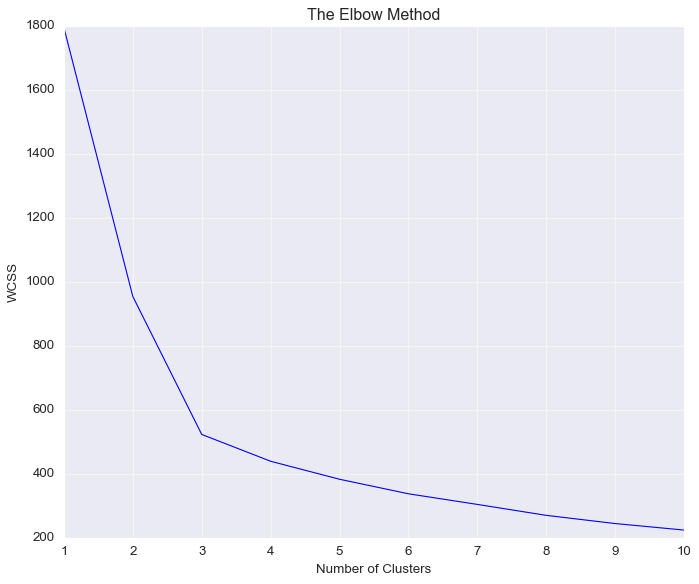

In [30]:
#K-MEANS CLUSTERING:-
#Apply the ELBOW CURVE method to find the optimum k- value
#Where ROC curve will be going to flat that point should be consider as optimum k- value for classifying the data
from sklearn.cluster import KMeans
sns.set_style(style='darkgrid')
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(finalDf)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [31]:
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(finalDf) 

In [32]:
#clf.cluster_centers_
y_kmeans
clf.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [33]:
y_kmeans 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [34]:
clf.cluster_centers_ 

array([[-2.48339768e-02,  1.79648516e+00,  2.00094105e-01,
         2.00000000e+00,  1.56250000e-02],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
         1.04838710e+00,  4.44089210e-16],
       [-2.68335824e+00, -1.09976347e+00, -2.48091551e-01,
         2.92307692e+00,  2.00000000e+00]])

In [35]:
#Cal. distance on Y-axis of k-value= 3 on X-axis
clf.inertia_

522.2806142752872

In [36]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
finalDf['clust']=md # creating a  new column and assigning it to new column 
finalDf   

,pc1,pc2,pc3,Type,Clust,clust
0,3.316751,-1.443463,-0.165739,1,0,1
1,2.209465,0.333393,-2.026457,1,0,1
2,2.516740,-1.031151,0.982819,1,0,1
3,3.757066,-2.756372,-0.176192,1,0,1
4,1.008908,-0.869831,2.026688,1,0,1
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3,2,2
174,-2.601956,-1.757229,0.207581,3,2,2
175,-2.677839,-2.760899,-0.940942,3,2,2
176,-2.387017,-2.297347,-0.550696,3,2,2


In [37]:
plt.style.use(['classic']) 
print(plt.style.available) 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

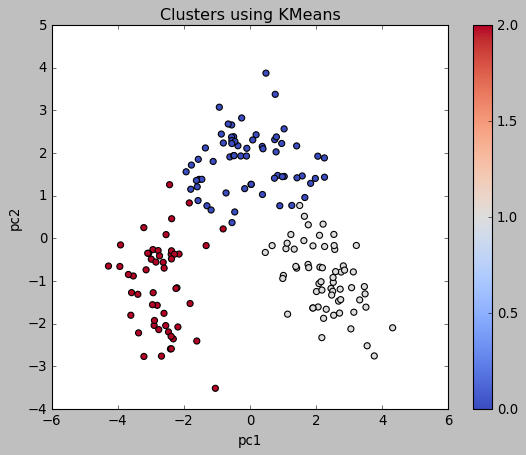

In [38]:
finalDf.plot(x="pc1",y ="pc2",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [39]:
#Within Cluster Sum of Square:- minimized the within cluster variance or within cluster sum of squared
WCSS  

[1792.885502660215,
 953.2461558238616,
 522.2806142752872,
 438.4582718171126,
 382.2371273284299,
 336.80290990246226,
 303.58925922007427,
 269.41698912912244,
 243.79176421928278,
 223.46011845987638]

In [40]:
#Find mean for each & every cluster based on variables by using groupby function
finalDf.iloc[:,:].groupby(finalDf.Clust).mean() 

,pc1,pc2,pc3,Type,clust
Clust,,,,,
0,1.123706,0.432914,0.139887,1.528000,0.496
1,-0.928582,3.073486,-4.585064,2.000000,0.000
2,-2.683358,-1.099763,-0.248092,2.923077,2.000


In [41]:
#No. of observation belongs to CLUSTER[0]
data = finalDf[(finalDf.Clust==0)]
data 

,pc1,pc2,pc3,Type,Clust,clust
0,3.316751,-1.443463,-0.165739,1,0,1
1,2.209465,0.333393,-2.026457,1,0,1
2,2.516740,-1.031151,0.982819,1,0,1
3,3.757066,-2.756372,-0.176192,1,0,1
4,1.008908,-0.869831,2.026688,1,0,1
...,...,...,...,...,...,...
125,-0.096810,2.109998,0.434826,2,0,0
126,0.038487,1.266762,0.687578,2,0,0
127,-1.597159,1.208144,3.361176,2,0,0
128,-0.479565,1.938841,1.296508,2,0,0


In [42]:
#No. of observation belongs to CLUSTER[1]
data = finalDf[(finalDf.Clust==1)]
data 

,pc1,pc2,pc3,Type,Clust,clust
59,-0.928582,3.073486,-4.585064,2,1,0


In [43]:
#No. of observation belongs to CLUSTER[2]
data = finalDf[(finalDf.Clust==2)]
data 

,pc1,pc2,pc3,Type,Clust,clust
61,-1.836250,0.829984,-1.605702,2,2,2
68,-0.812805,0.220514,-0.707005,2,2,2
83,-2.538977,0.087443,0.474251,2,2,2
118,-2.433013,1.257141,-1.903027,2,2,2
130,-1.327102,-0.170389,-1.180013,3,2,2
131,-2.384501,-0.374583,-0.723823,3,2,2
132,-2.936940,-0.263862,-0.167640,3,2,2
133,-2.146811,-0.368255,-0.453301,3,2,2
134,-2.369869,0.459635,-1.101400,3,2,2
135,-3.063842,-0.353413,-1.099124,3,2,2
